In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as st

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from IPython.display import display

In [2]:
# lets say our trip plan is for 7 days from 2021-2-21 to 2021-2-27

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
Base = automap_base()
Base.prepare(engine, reflect = True)
station_ref = Base.classes.station
measureent_ref = Base.classes.measurement
print("Station Reference:", (station_ref))
print("Measurement Reference:", (measureent_ref))

Station Reference: <class 'sqlalchemy.ext.automap.station'>
Measurement Reference: <class 'sqlalchemy.ext.automap.measurement'>


## Precipitation Analysis

Data of the 12 Months year


,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


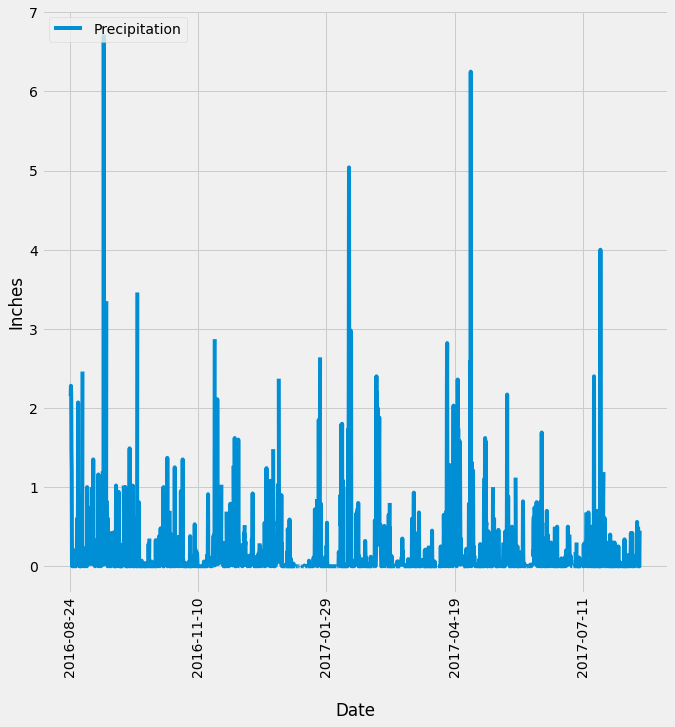

In [5]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

prec_data_last_12m = engine.execute('SELECT measurement.date, measurement.prcp FROM measurement WHERE measurement.date > "2016-08-23"')
prec_data_last_12m_df = pd.DataFrame(prec_data_last_12m)
prec_data_last_12m_df.columns = ['date', 'prcp']
prec_data_last_12m_df = prec_data_last_12m_df.sort_values(by='date') #Sorted DataFrame for "precipitation" plot analysis
prec_data_last_12m_df_summed_days = prec_data_last_12m_df.set_index('date') # Indexed DataFrame by "date"
print('Data of the 12 Months year')
display(prec_data_last_12m_df_summed_days)
fig, ax = plt.subplots()
prec_data_last_12m_df_summed_days.plot(figsize = (10,10), rot = 90, ylabel = 'Inches', xlabel = "\nDate", ax = ax)
ax.legend(["Precipitation"], loc = 'upper left');

In [6]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prec_data = engine.execute('SELECT measurement.date, measurement.prcp FROM measurement')
prec_data_df = pd.DataFrame(prec_data)
prec_data_df.columns = ['date', 'prcp']
prec_data_df_summary = prec_data_last_12m_df_summed_days.describe()
print('Data Summary Statistic')
display(prec_data_df_summary)

Data Summary Statistic


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [7]:
# Design a query to show how many stations are available in this dataset?

avlbl_stn = engine.execute('SELECT measurement.station FROM measurement GROUP BY measurement.station')
avlbl_stn_df = pd.DataFrame(avlbl_stn)
print('Total Number of stations available: ', len(avlbl_stn_df))

Total Number of stations available:  9


In [8]:
# What are the most active stations? (i.e. what stations have the most rows)?

stns_count = engine.execute('SELECT measurement.station, COUNT (measurement.station) FROM measurement GROUP BY measurement.station ORDER BY COUNT (measurement.station) DESC')
stns_count_df = pd.DataFrame(stns_count)
stns_count_df.columns = ['station','count']
print('Three most active stations:')
display(stns_count_df[:3])

# List the stations and the counts in descending order.
print('All stations with their observation counts in descending order:')
display(stns_count_df)

Three most active stations:


,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709


All stations with their observation counts in descending order:


,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [9]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

max_key = stns_count_df['station'][0]
print('Key with most active station:', max_key)

stns_ma_0 = engine.execute('SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE measurement.station LIKE "'+max_key+'%"')
names = ['Minimum Temperature:', 'Maximum Temperature:', 'Average Temperature:']
print('Result of summary by SQL query:')
for val in stns_ma_0:
    for name, sub_val in zip(names, val):
        print(name,sub_val)

Key with most active station: USC00519281
Result of summary by SQL query:
Minimum Temperature: 54.0
Maximum Temperature: 85.0
Average Temperature: 71.66378066378067


Temperature data of the last year


,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


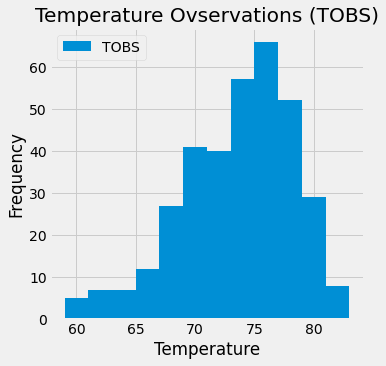

In [10]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram.

tmp_data_last_12m = engine.execute('SELECT measurement.date, tobs FROM measurement WHERE measurement.station LIKE "USC00519281%" AND measurement.date > "2016-08-23"')
tmp_data_last_12m_df = pd.DataFrame(tmp_data_last_12m)
tmp_data_last_12m_df.columns = ['date', 'tobs']
tmp_data_last_12m_df_summed_days = tmp_data_last_12m_df
print('Temperature data of the last year')
display(tmp_data_last_12m_df_summed_days)
fig, ax = plt.subplots(figsize = (5, 5))
tmp_data_last_12m_df_summed_days.hist(bins = 12, ax = ax)
ax.set_title('Temperature Ovservations (TOBS)')
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')
ax.legend(['TOBS'], loc = 'upper left')

## Bonus Challenge: Temperature Analyses

In [11]:
# This function called 'calc_temps' will accept start date and end date in the format ''%Y-%m-%d'
# and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
    return(engine.execute('select min(tobs), avg(tobs), max(tobs) from measurement where measurement.date between "'+start_date+'" and "'+end_date+'"'))

    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

data = calc_temps('2012-02-28', '2012-03-05')
for row in data:
    print(row)
    for cols in row:
        print(round(cols, 1))

(62.0, 69.57142857142857, 74.0)
62.0
69.6
74.0


In [12]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Lets say the days we select are from 2021-2-21 to 2021-2-27
# We are taking data for 2017 because it do not have the latest data

data = calc_temps('2017-02-21', '2017-02-27')
names = ['Min. Temp.',  'Avg. Temp.','Max. Temp.']
for row in data :
    data = row
    for name,cols in zip(names,row):
        print(name, round(cols, 1))

Min. Temp. 61.0
Avg. Temp. 69.4
Max. Temp. 77.0


(61.0, 69.38636363636364, 77.0)


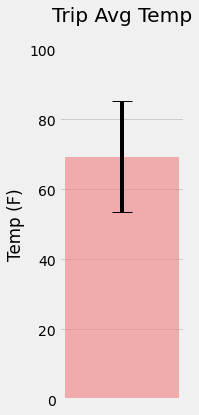

In [13]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the 'y error' bar (YERR)

print(data)
fig, ax = plt.subplots(figsize = (2, 6))
ax.bar(data[1], data[1], yerr = data[2]-data[0], align = 'center', alpha = 0.6, ecolor = 'black', capsize = 10, color = 'lightcoral')
ax.set_ylabel('Temp (F)')
ax.set_xticks([])
ax.set_ylim(0,100)
ax.set_title('Trip Avg Temp\n')
ax.yaxis.grid(True)

In [14]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation.

rainfall_data = engine.execute('SELECT measurement.station, SUM (measurement.prcp) FROM measurement WHERE measurement.date BETWEEN "2017-02-21" AND "2017-02-27" GROUP BY measurement.station ORDER BY SUM (measurement.prcp) DESC')
rainfall_data_df = pd.DataFrame(rainfall_data)
rainfall_data_df.columns = ['station', 'prcp']
tables = engine.table_names()
table_2 = engine.execute('SELECT * FROM '+tables[1])
data_frame_2 = pd.DataFrame(table_2)
data_frame_2.columns = table_2.keys()
rainfall_data_df = pd.merge(rainfall_data_df, data_frame_2[['station', 'name', 'latitude', 'longitude', 'elevation']])
display(rainfall_data_df)

,station,prcp,name,latitude,longitude,elevation
0,USC00516128,0.51,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00517948,0.17,"PEARL CITY, HI US",21.39340,-157.97510,11.9
2,USC00519397,0.16,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
3,USC00519523,0.13,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,0.11,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519281,0.06,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,USC00513117,0.06,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6


In [15]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day).

def daily_normals(date):
    
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return(engine.execute('SELECT MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement WHERE strftime("%m-%d", measurement.date) = "'+date[-5:]+'"'))
    
dailay = daily_normals("01-01")
data = dailay
names = ['Min. Temp.', 'Max. Temp.', 'Avg. Temp.']
print(tuple(data)[0])
for row in data:    
    for name, cols in zip(names, row):
        print(name, round(cols, 1))

(62.0, 77.0, 69.15384615384616)


In [16]:
# Calculate the daily normals for your trip
# Push each tuple of calculations into a list called 'normals'
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []
dates_range = ["2021-2-21", "2021-2-27"]
md_strings = ["2021-02-21", "2021-02-22", "2021-02-23", "2021-02-24", "2021-02-25", "2021-02-26", "2021-02-27"]

for md in md_strings:
    data = daily_normals(md)
    normals.append(tuple(data)[0])
print('Normals for all trip days:')
display(normals)

Normals for all trip days:


[(63.0, 76.0, 69.79629629629629),
 (60.0, 83.0, 70.15789473684211),
 (62.0, 81.0, 70.35593220338983),
 (61.0, 76.0, 68.56666666666666),
 (61.0, 76.0, 68.59649122807018),
 (62.0, 78.0, 69.89285714285714),
 (58.0, 77.0, 69.98148148148148)]

In [17]:
# Load the previous query results into a Pandas DataFrame and add the 'trip_dates' range as the 'date' index

normals_df = pd.DataFrame(normals, md_strings)
normals_df.columns = names
display(normals_df)

,Min. Temp.,Max. Temp.,Avg. Temp.
2021-02-21,63.0,76.0,69.796296
2021-02-22,60.0,83.0,70.157895
2021-02-23,62.0,81.0,70.355932
2021-02-24,61.0,76.0,68.566667
2021-02-25,61.0,76.0,68.596491
2021-02-26,62.0,78.0,69.892857
2021-02-27,58.0,77.0,69.981481


7


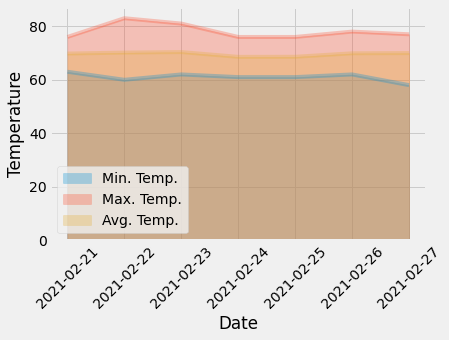

In [18]:
# Plot the daily normals as an area plot with 'stacked = False'

ax = normals_df.plot.area(stacked = False, alpha = 0.3, rot = 45)
ax.set_ylabel('Temperature')
x_ticks = ['2021-'+md for md in md_strings]
print(len(x_ticks))
ax.set_xlabel('Date')
ax.yaxis.grid(True)

### T-TEST :
Since t-test is a statistical test that is used to compare the means of two groups therefore, here in my assignment, I have used a paired t-test to compare the 'means' of first: 'average temperature' and maximum temperature', and then: 'average temperature' and minimum temperature'.

In [19]:
ttest1 = st.ttest_1samp(normals_df['Avg. Temp.'], normals_df['Max. Temp.'].mean())
ttest2 = st.ttest_1samp(normals_df['Avg. Temp.'], normals_df['Min. Temp.'].mean())

print('PAIRED T-TEST\n\nT-Test 1: Avg. Temp. & Max. Temp.\n', ttest1)
print('\nT-Test 2: Avg. Temp. & Min. Temp.\n', ttest2)

PAIRED T-TEST

T-Test 1: Avg. Temp. & Max. Temp.
 Ttest_1sampResult(statistic=-30.756957986848565, pvalue=7.842149143532208e-08)

T-Test 2: Avg. Temp. & Min. Temp.
 Ttest_1sampResult(statistic=31.11542570178966, pvalue=7.31822113046979e-08)
